# Modèle Cox-Ross-Rubinstein

$\textbf{Élève:}$ BLILET Hatim

$\textbf{Groupe de PC:}$ GR3

Import usuels

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sps

## Question 1

$\textbf{a. }$ Le calcul du vecteur $S^n_j$ est aisé, pour le rendre plus rapide, on écrit:
$$S^n_j = (S_0u^j q^i)_{i\in[|0,j|]} \text{ où }q = \dfrac{d}{u}$$

In [2]:
def Sn(T,n,mu,sigma,j,S0=100):
    assert j<=n
    assert n>=0
    u= np.exp(mu*T/n +sigma*np.sqrt(T/n))
    d= np.exp(mu*T/n -sigma*np.sqrt(T/n))
    q = d/u
    return S0*(u**j)*np.array([q**i for i in range(j+1)])

$\textbf{b.}$ Il s'agit du calcul de:
$$(S_n -K)_+ = ((S_n^n(i)-K)_+)_{i\in [|0,n|]}$$

In [3]:
def Payoff(T,n,mu,sigma,K,S0=1):
    vector = Sn(T,n,mu,sigma,n,S0) ## pour éviter deux appels à la fonction Sn
    return (vector>=K)*(vector-K)

$\textbf{c.}$ Rappellons que la mesure sans risque est caractérisée par:
$$\textbf{Q}_n(\text{up}) = 1 -\textbf{Q}_n(\text{down})  = \dfrac{R_n - d_n}{u_n-d_n} = \dfrac{e^{rT/n}- u_n}{d_n-u_n} =q_n$$
D'après le cours:
$$p^n(B^n) = e^{-rT}\textbf{E}^{\textbf{Q}_n}((S^n-K)^+)= e^{-rT}\sum_{i=0}^N (S_n^n(i)-K)_+ \textbf{Q}_n(S^n =S^n_n(i))$$
Comme: 
$$\textbf{Q}_n(S^n =S^n_n(i)) =\textbf{Q}_n(i \text{ downs}) = \binom{n}{i}q_n^{n-i}(1-q_n)^i \text{ avec }q_n = \dfrac{e^{rh_n} - d_n}{u_n-d_n}$$
On déduit que la quantité cherchée est égale à:
$$p^n(B^n) = e^{-rT}  \sum_{i=0}^N (S_i^n-K)_+\binom{n}{i}q_n^{n-i}(1-q_n)^i = e^{-rT}q_n^n\sum_{i=0}^N (S_n^n(i)-K)_+\binom{n}{i}\bigg(\dfrac{1-q_n}{q_n}\bigg)^i$$
Pour la partie pratique, en notant $P_n = \texttt{Payoff}(T,n,\mu,\sigma,K)$ et $V=\bigg((S_n^n(i)-K)_+\binom{n}{i}\bigg(\dfrac{1-q_n}{q_n}\bigg)^i\bigg)_{i\in [|0,n|]}$, on a: 
$$p^n(B^n) = e^{-rT}q_n^n\langle P_n,V\rangle$$

In [4]:
def Calln(T,n,r,mu,sigma,K,S0=100):
    u= np.exp(mu*T/n +sigma*np.sqrt(T/n))
    d= np.exp(mu*T/n -sigma*np.sqrt(T/n))
    q_n = (np.exp(r*T/n) - d)/(u-d)
    rapp =(1-q_n)/q_n
    V = np.array([math.comb(n,i)* (rapp**i) for i in range(n+1)])
    Pn = Payoff(T,n,mu,sigma,K,S0)
    return (q_n**n) *np.exp(-r*T)*Pn@V

$\textbf{d. }$ D'après le cours:
$$\forall j\in [|1,n|],\forall i\in [|0,j|]:\Delta_j^n(i)= \dfrac{\text{Call}_n(t= t_{j+1}, K=K, T=T, S_{t_{j+1}} = u_n\cdot S_j^n(j))-\text{Call}_n(t= t_{j+1}, K=K, T=T, S_{t_{j+1}} = d_n\cdot S_j^n(j))}{(u_n-d_n)S_j^n(i)} $$
Pour faciliter les calculs, on remarque que:
$$\text{Call}_n(t= t_{j+1}, K=K, T=T, S_{t_{j+1}} = u_n\cdot S_j^n(j)) = \text{Call}_{n-j-1}(t= 0, K=K, T=T-t_{j+1}, S_{0} = u_n\cdot S_j^n(j))$$
La dernière quantité est calculable par appel à la fonction $\texttt{Calln}$.

In [5]:
def Deltan(T,n,r,mu, sigma,K,j,S0):
    assert j<n
    u= np.exp(mu*T/n +sigma*np.sqrt(T/n))
    d= np.exp(mu*T/n -sigma*np.sqrt(T/n))
    L=[]
    V= Sn(T,n,mu,sigma,j,S0)
    for val in V:
        CurrentValue = (Calln(T-(j+1)*T/n,n-1-j,r,mu,sigma,K,val*u)-Calln(T-(j+1)*T/n,n-1-j,r,mu,sigma,K,val*d))/((u-d)*val)
        L.append(CurrentValue)
    return np.array(L)

$\textbf{1.e}$ L'approximation discrète du prix d'option arrive à capturer la décroissance du prix de l'option et de la stratégie de couverture par rapport au prix d'exercice $K$. La preuve théorique du fait que $Call(t,S,\cdot)\searrow$ est abordée en cours.

In [6]:
L = np.arange(80,121)
n=1000
sigma=0.3
r=0.05
mu=0.1
S0=100
T=2

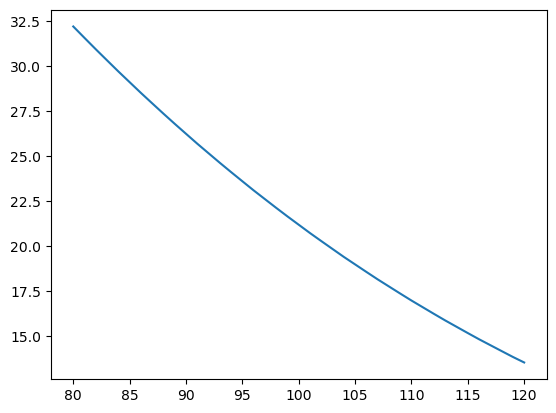

In [7]:
vals = [Calln(T,n,r,mu,sigma,K,S0) for K in L]
plt.plot(L,vals)
plt.show()

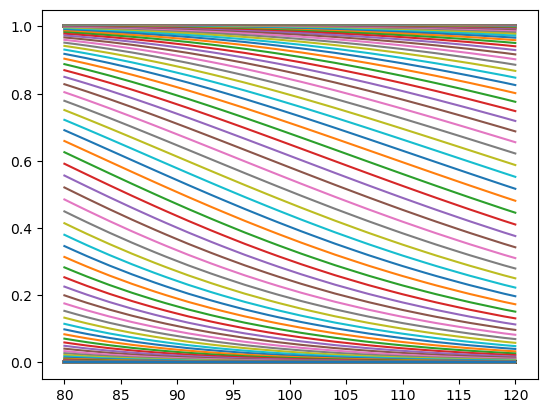

In [8]:
vals = [Deltan(T,n,r,mu,sigma,K,500,S0) for K in L] #On trace la variation de chaqune des composantes de \Delta_10^n
plt.plot(L,vals)
plt.show()

## Question 2

$\textbf{2.a}$ D'après le cours:
$$Call(t= 0,K,T,S =S_0, r)= S_0\textbf{N}(\textbf{d}_+(s,Ke^{-rT}, \sigma^2T))- Ke^{-rT}\textbf{N}(\textbf{d}_-(s,Ke^{-rT}, \sigma^2T))$$
Avec:
$$\textbf{N}(x) = \textbf{P}(\mathcal{N}(0,1)\leq x)\text{ et }\textbf{d}_\pm(s,k,v) = \dfrac{\ln(s/k)}{\sqrt{v}}\pm \dfrac{\sqrt{v}}{2}$$

In [9]:
def d(s,k,v,eps):
    return np.log(s/k)/np.sqrt(v)+eps*np.sqrt(v)/2
def Call(T,r,sigma,K,S0=100):
    K_tilde=K*np.exp(-r*T)
    return S0*sps.norm.cdf(d(S0,K_tilde,sigma**2 * T,1)) - K_tilde*sps.norm.cdf(d(S0,K_tilde,sigma**2 * T,-1))

$\textbf{2.b}$ Le tracé affirme de plus la convergence du prix du modèle discret vers le prix continu de la question $\textbf{2.a}$ démontrée en cours (Theorem $\textbf{2.8}$, p.26) 

In [10]:
def error(T,n,r,mu,sigma,K,S0=100): return Calln(T,n,r,mu,sigma,K,S0)/Call(T,r,sigma,K,S0)-1

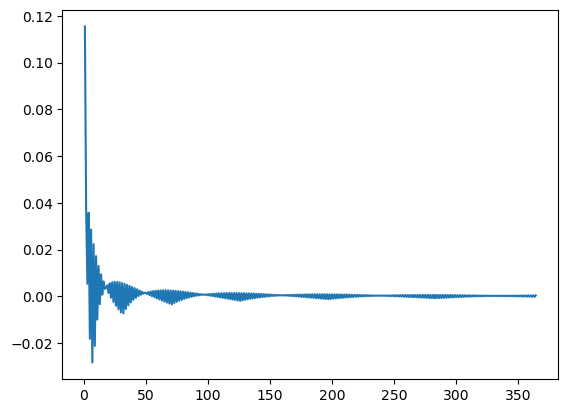

In [11]:
K=105
sigma=0.3
r=0.05
mu=0.1
S0=100
T=2
L=np.arange(1,365)
vals = [error(T,n,r,mu,sigma,K,S0) for n in L]
plt.plot(L,vals)
plt.show()